ARIMA
Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo ARMA.

AR: Autoregression : Um modelo que usa a relação dependende entre uma observação e alguns lags.

I: Integrated : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

MA: Moving Average : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

   residual error = expected − predicted
Isso é diferente de Moving Average Smoothing.
Erros residuais contém estruturas temporais que podem ser modeladas.
Existem sinais complexos nos erros residuais.
Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.

O modelo arima contém alguns parâmetros

# ARIMA(p,d,q)
p: O número de lags que foram devem ser incluídos no modelo.
d: O número de vezes que as observações serão diferenciadas.
q: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6


In [57]:
# Função de parsing de datas
dateparse = lambda dates: pd.to_datetime(dates, format='%m-%d-%Y')

# Caminho do arquivo Excel
arquivo_excel = './dataset.xlsx'

# Nome da aba que você quer carregar
nome_aba = 'historicoLME'

# Lendo o arquivo Excel e carregando a aba especificada em um DataFrame
df = pd.read_excel(arquivo_excel, sheet_name=nome_aba, parse_dates=['MÊS'], date_parser=dateparse)

# Função para alterar o ano
def alterar_ano(data):
    year_str = str(data.year)
    if year_str.startswith('22'):
        new_year_str = '20' + year_str[2:]
        return data.replace(year=int(new_year_str))
    return data

# Aplicar a função na coluna 'MÊS'
df['MÊS'] = df['MÊS'].map(alterar_ano)

# Definindo a coluna 'MÊS' como índice
df.set_index('MÊS', inplace=True)

# Ordenando o DataFrame pelo índice
df = df.sort_index()

# Exibindo o DataFrame resultante
print(df.tail())


            USD / Ton Cobre  USD / Ton Chumbo  exchange rate USD / €
MÊS                                                                 
2024-01-01          8393.18           2035.21                 1.0903
2024-02-01          8342.73           2086.30                 1.0905
2024-03-01          8309.36           2083.02                 1.0795
2024-04-01          8674.60           2055.90                 1.0872
2024-05-01          8393.18           2035.21                 1.0903


C:\Users\dataan\AppData\Local\Temp\ipykernel_22296\109504889.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_excel(arquivo_excel, sheet_name=nome_aba, parse_dates=['MÊS'], date_parser=dateparse)


In [58]:
# Nomes das colunas que você quer excluir
drop_cobre = ['USD / Ton Chumbo', 'exchange rate USD / €']

# Excluindo as colunas
dfcobre = df.drop(columns=drop_cobre)

# Exibindo o DataFrame resultante
dfcobre.head()

,USD / Ton Cobre
MÊS,
2018-12-01,5964.0
2019-01-01,6146.0
2019-02-01,6535.0
2019-03-01,6484.0
2019-04-01,6441.0


In [59]:
print(dfcobre.shape)
dfcobre.info()
dfcobre.describe()

(66, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-12-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   USD / Ton Cobre  66 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


,USD / Ton Cobre
count,66.000000
mean,7826.354394
std,1532.328857
min,4797.000000
25%,6442.375000
50%,8202.940000
75%,9022.827500
max,10235.800000


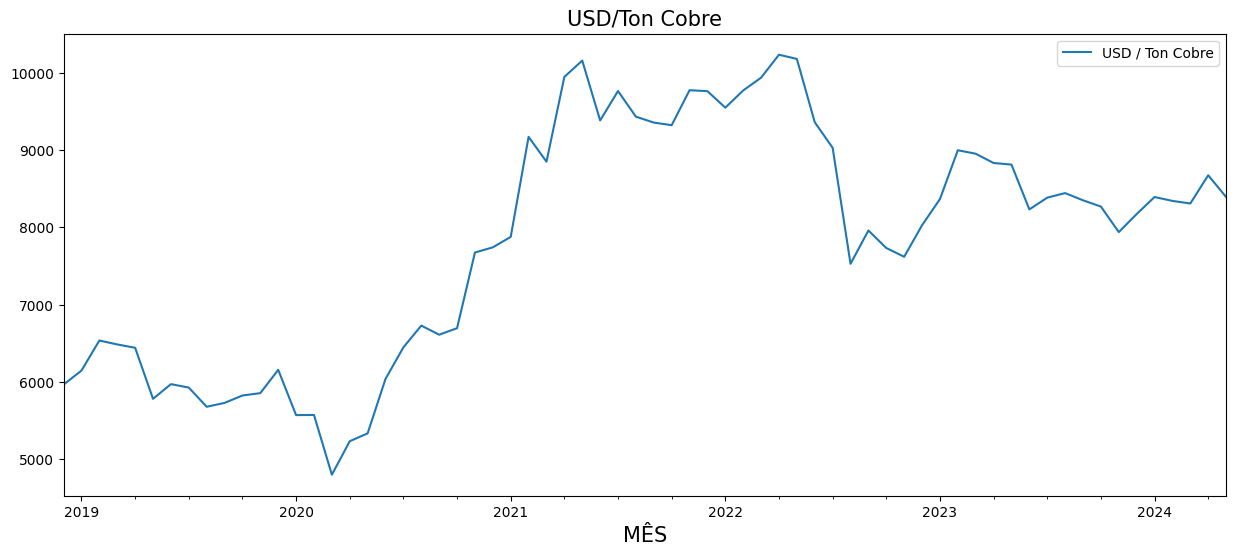

In [60]:
dfcobre.plot(y='USD / Ton Cobre')
plt.xlabel('MÊS',size=15)
plt.title('USD/Ton Cobre',size=15)
plt.show()

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

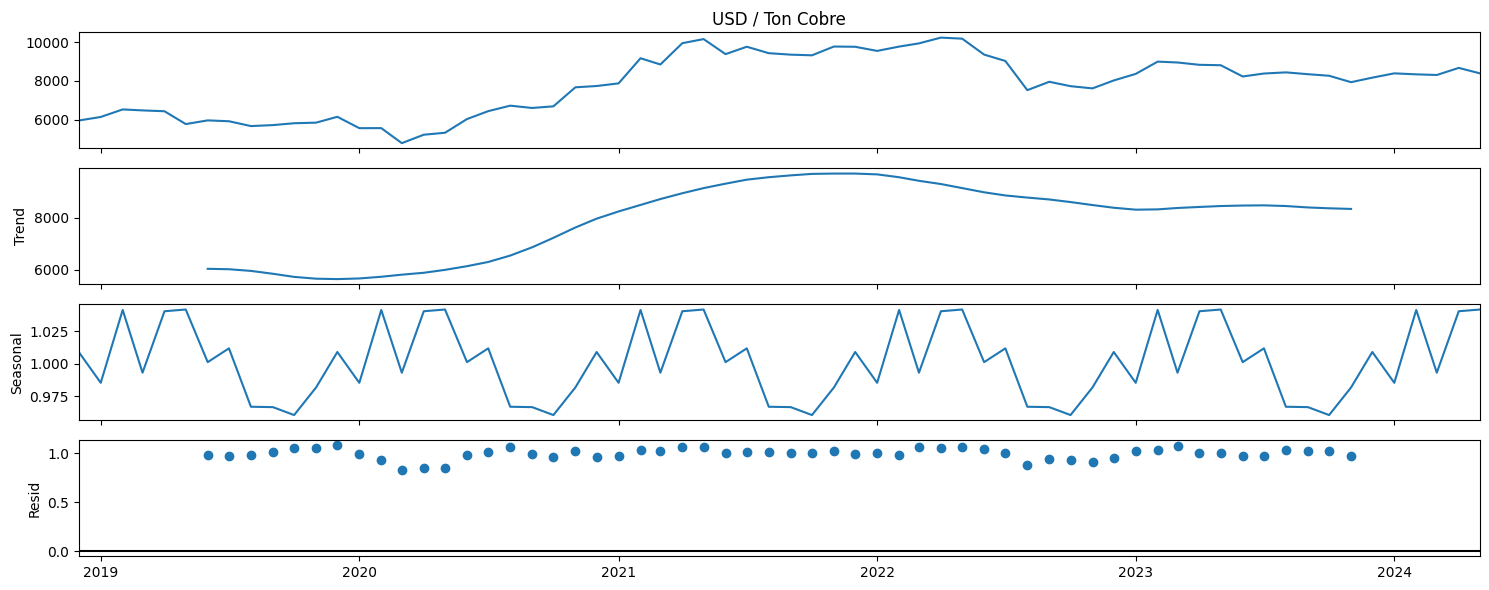

In [62]:
decompose_cobre = seasonal_decompose(dfcobre['USD / Ton Cobre'], model='multiplicative', period=12)
fig = decompose_cobre.plot()
plt.tight_layout()
plt.show()

In [63]:
stepwise_cobre=auto_arima(dfcobre,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=830.260, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=825.466, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=830.120, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=822.918, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=821.893, Time=0.14 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=824.118, Time=0.02 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=823.110, Time=0.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=824.265, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=822.845, Time=

In [64]:
stepwise_cobre

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [65]:
stepwise_cobre.aic()

821.8925455049497

In [66]:
stepwise_cobre1=auto_arima(dfcobre,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=830.260, Time=0.00 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=824.118, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=821.893, Time=0.14 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=830.444, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=825.573, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=823.110

In [67]:
stepwise_cobre1 

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [68]:
stepwise_cobre1.aic()

820.004171547383

In [69]:
train_cobre=dfcobre.loc['2018-12-01':'2023-04-01']
test_cobre=dfcobre.loc['2023-05-01':]

In [70]:
stepwise_cobre.fit(train_cobre)
stepwise_cobre1.fit(train_cobre)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [71]:
forecast_cobre=stepwise_cobre.predict(n_periods=24)
forecast_cobre1=stepwise_cobre1.predict(n_periods=24)

In [72]:
forecast_cobre=pd.DataFrame(forecast_cobre,index=test_cobre.index, columns=['previsão modelo 1'])
forecast_cobre1=pd.DataFrame(forecast_cobre1,index=test_cobre.index, columns=['previsão modelo 2'])

In [73]:
forecast_cobre.head(10)

,previsão modelo 1
MÊS,
2023-05-01,8849.776210
2023-06-01,8622.875046
2023-07-01,8605.752333
2023-08-01,7839.187122
2023-09-01,8038.230102
2023-10-01,7939.548402
2023-11-01,8271.345083
2023-12-01,8531.535430
2024-01-01,8770.511538


In [74]:
forecast_cobre1.head(10)

,previsão modelo 2
MÊS,
2023-05-01,8683.754020
2023-06-01,7659.114413
2023-07-01,7269.571759
2023-08-01,6102.496393
2023-09-01,6402.821100
2023-10-01,6235.297438
2023-11-01,6288.991337
2023-12-01,6603.056608
2024-01-01,6812.714161


<Figure size 2000x500 with 0 Axes>

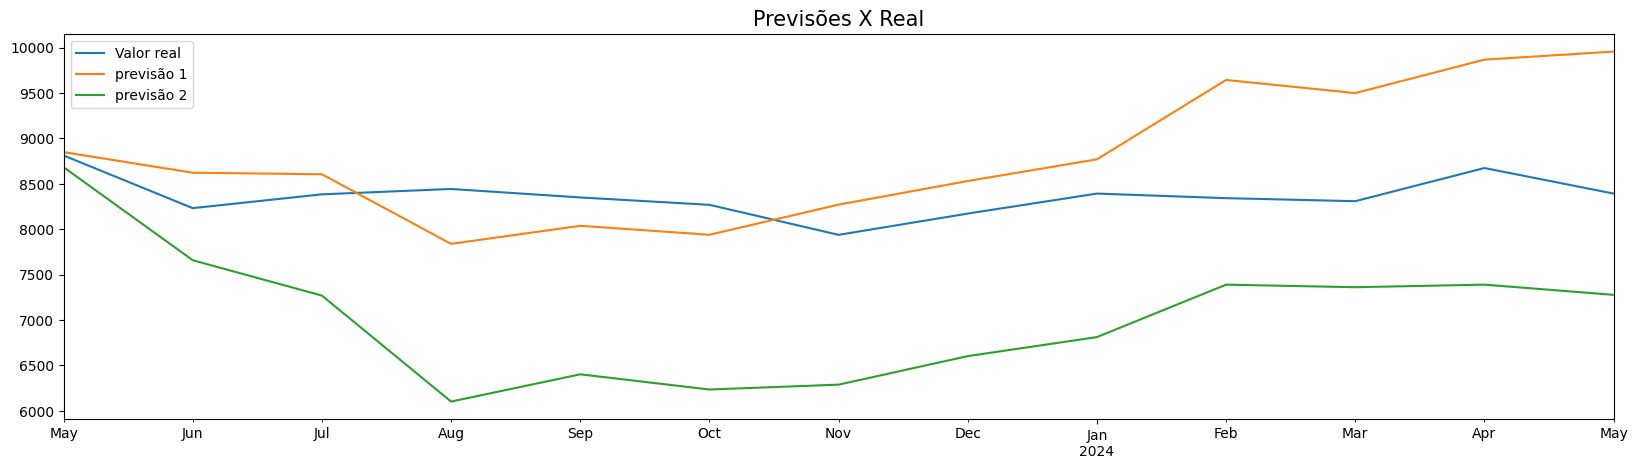

In [75]:
plt.figure(figsize=(20,5))
pd.concat([test_cobre, forecast_cobre, forecast_cobre1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

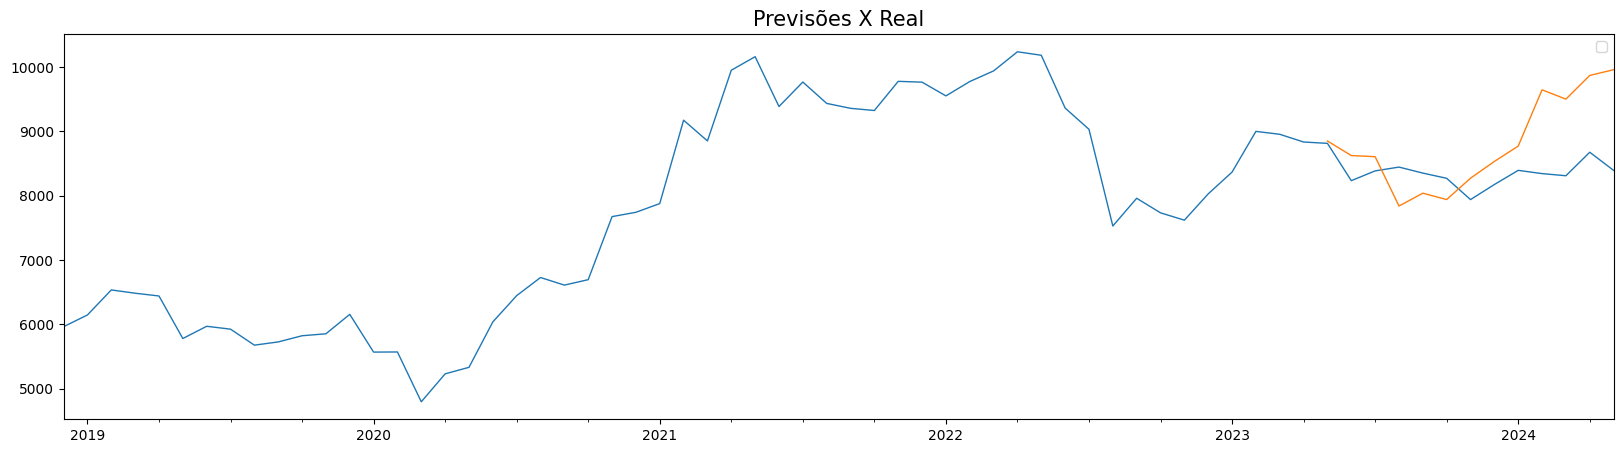

In [76]:
pd.concat([dfcobre, forecast_cobre],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

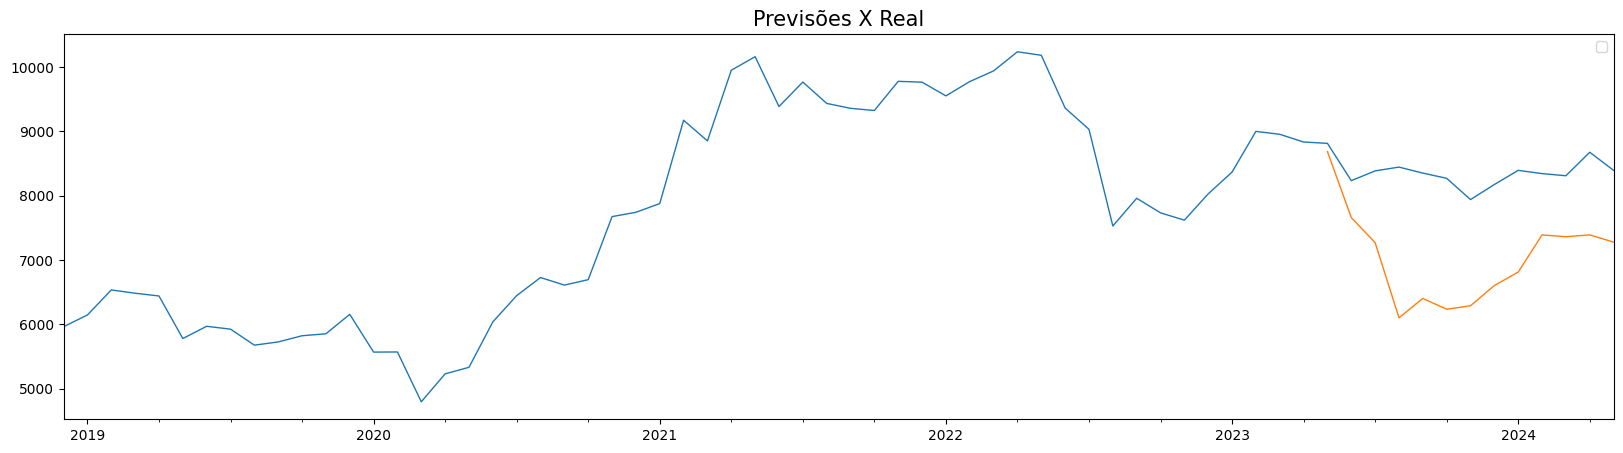

In [77]:
pd.concat([dfcobre, forecast_cobre1],axis=1).plot(linewidth=1, figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

In [78]:
# Nomes das colunas que você quer excluir
drop_chumbo = ['USD / Ton Cobre', 'exchange rate USD / €']

# Excluindo as colunas
dfchumbo = df.drop(columns=drop_chumbo)

# Exibindo o DataFrame resultante
dfchumbo.head()

,USD / Ton Chumbo
MÊS,
2018-12-01,2008.0
2019-01-01,2089.0
2019-02-01,2153.0
2019-03-01,2021.0
2019-04-01,1940.0


In [79]:
print(dfchumbo.shape)
dfchumbo.info()
dfchumbo.describe()

(66, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-12-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD / Ton Chumbo  66 non-null     float64
dtypes: float64(1)
memory usage: 3.1 KB


,USD / Ton Chumbo
count,66.000000
mean,2071.046061
std,182.758181
min,1610.000000
25%,1972.702500
50%,2086.240000
75%,2187.785000
max,2428.520000


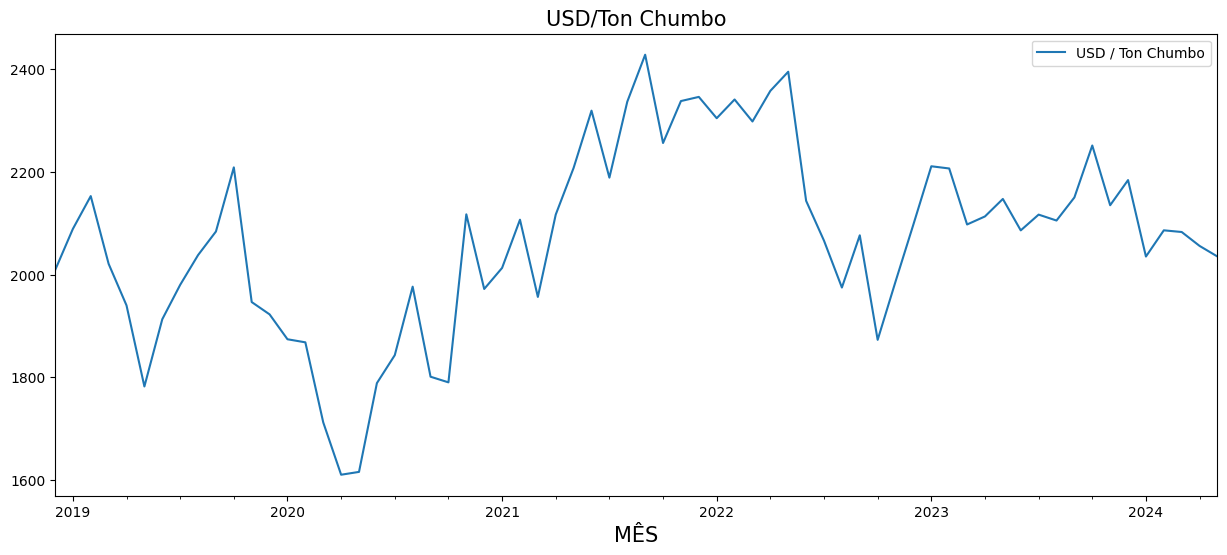

In [80]:
dfchumbo.plot(y='USD / Ton Chumbo')
plt.xlabel('MÊS',size=15)
plt.title('USD/Ton Chumbo',size=15)
plt.show()

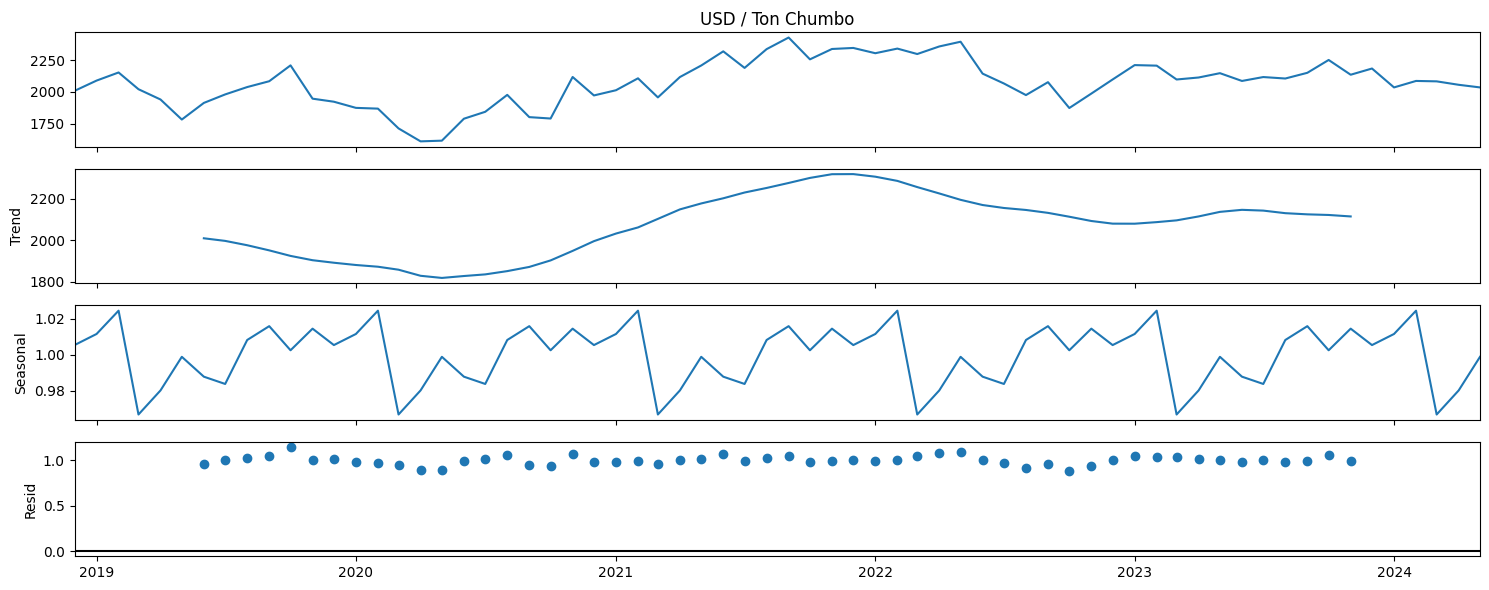

In [81]:
decomposicao_chumbo = seasonal_decompose(dfchumbo['USD / Ton Chumbo'], model='multiplicative', period=12)
fig = decomposicao_chumbo.plot()
plt.tight_layout()
plt.show()

In [82]:
stepwise_chumbo=auto_arima(dfchumbo,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=690.804, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=685.957, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=691.769, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=686.846, Time=0.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=685.459, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=686.460, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=685.598, Time=0.06 sec

In [83]:
stepwise_chumbo

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [84]:
stepwise_chumbo.aic()

685.4588465535312

In [85]:
stepwise_chumbo1=auto_arima(dfchumbo,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=690.804, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=685.459, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=686.460, Time=0.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=691.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=685.598, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=686.565

In [86]:
stepwise_chumbo1

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [87]:
stepwise_chumbo1.aic()

685.4588465535312

In [88]:
train_chumbo=dfchumbo.loc['2018-12-01':'2023-04-01']
test_chumbo=dfchumbo.loc['2023-05-01':]

In [89]:
stepwise_chumbo.fit(train_chumbo)
stepwise_chumbo1.fit(train_chumbo)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [90]:
forecast_chumbo=stepwise_chumbo.predict(n_periods=24)
forecast_chumbo1=stepwise_chumbo1.predict(n_periods=24)

In [91]:
forecast_chumbo=pd.DataFrame(forecast_chumbo,index=test_chumbo.index, columns=['previsão modelo 1'])
forecast_chumbo1=pd.DataFrame(forecast_chumbo1,index=test_chumbo.index, columns=['previsão modelo 2'])

In [92]:
forecast_chumbo.head(10)

,previsão modelo 1
MÊS,
2023-05-01,2169.812240
2023-06-01,2047.831936
2023-07-01,1951.271656
2023-08-01,1945.407955
2023-09-01,2043.519974
2023-10-01,1851.114432
2023-11-01,1953.396460
2023-12-01,2027.901859
2024-01-01,2085.884575


In [93]:
forecast_chumbo1.head(10)

,previsão modelo 2
MÊS,
2023-05-01,2169.812240
2023-06-01,2047.831936
2023-07-01,1951.271656
2023-08-01,1945.407955
2023-09-01,2043.519974
2023-10-01,1851.114432
2023-11-01,1953.396460
2023-12-01,2027.901859
2024-01-01,2085.884575


<Figure size 2000x500 with 0 Axes>

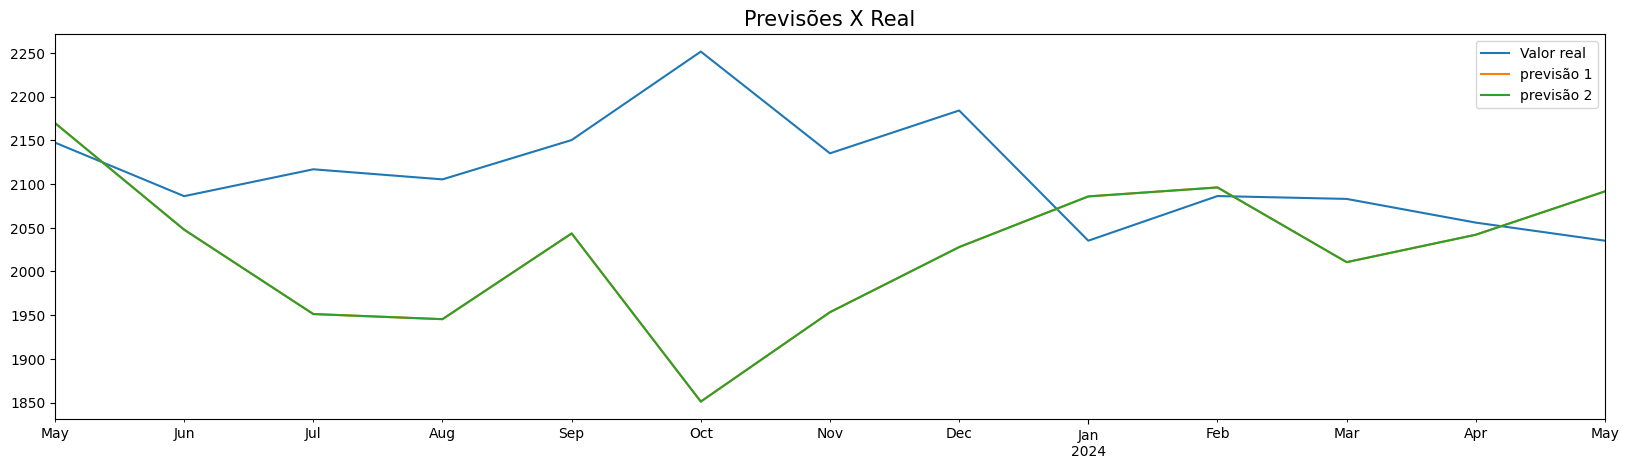

In [94]:
plt.figure(figsize=(20,5))
pd.concat([test_chumbo,forecast_chumbo, forecast_chumbo1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

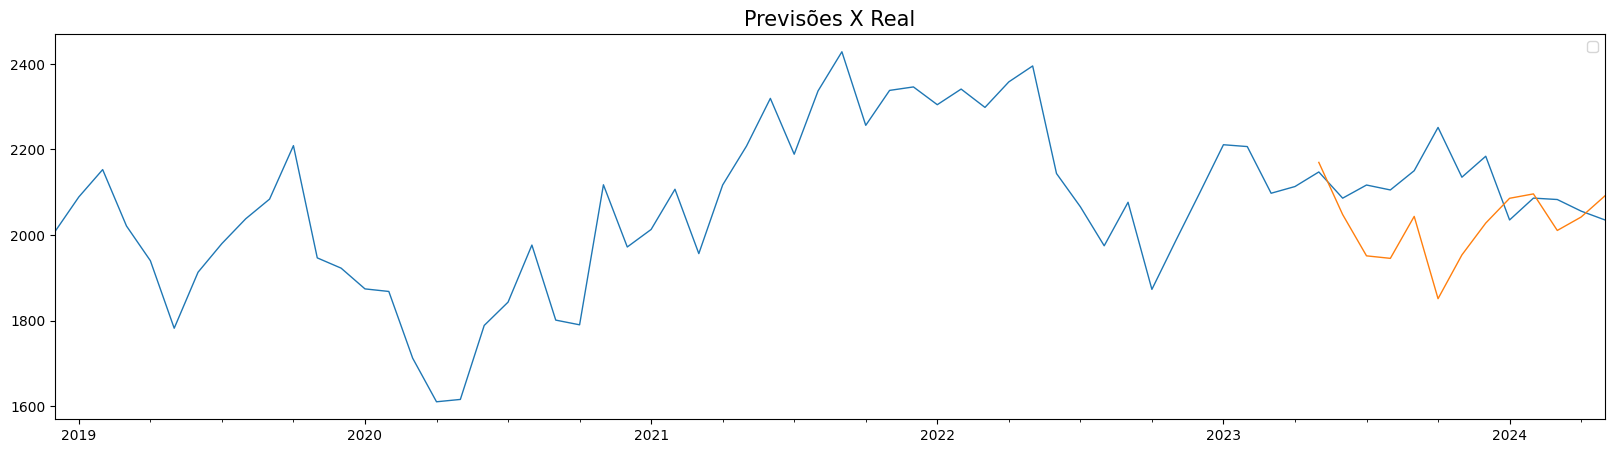

In [95]:
pd.concat([dfchumbo,forecast_chumbo],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

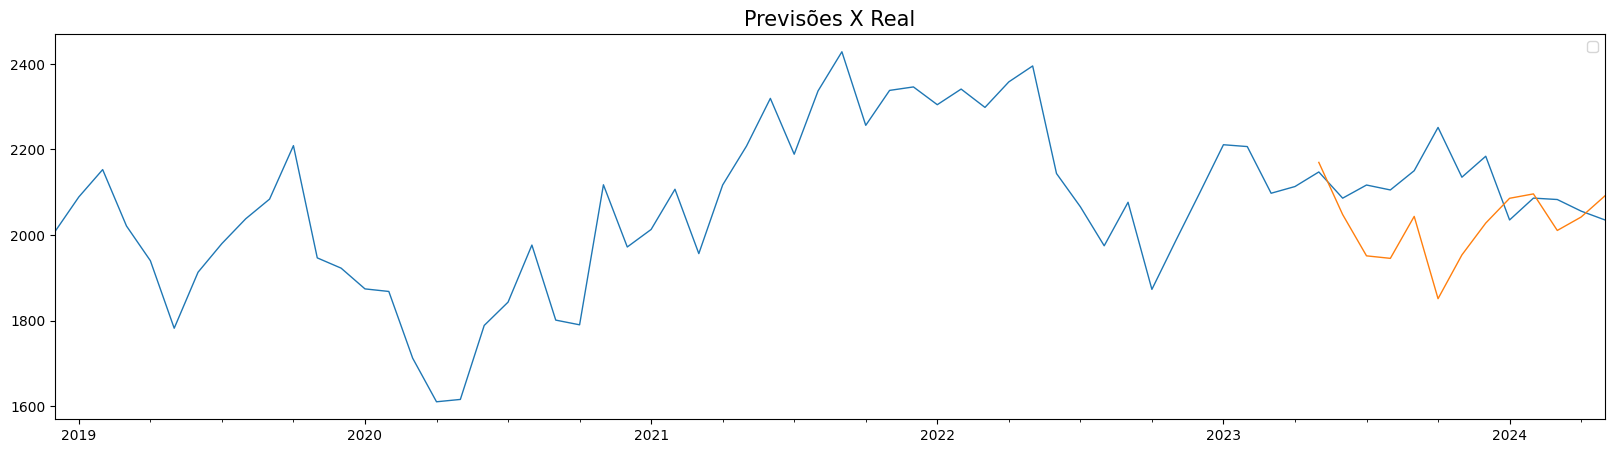

In [96]:
pd.concat([dfchumbo,forecast_chumbo1],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

In [97]:
# Nomes das colunas que você quer excluir
drop_cambio = ['USD / Ton Chumbo','USD / Ton Cobre']

# Excluindo as colunas
dfcambio = df.drop(columns=drop_cambio)

# Exibindo o DataFrame resultante
dfcambio.head()

,exchange rate USD / €
MÊS,
2018-12-01,1.1450
2019-01-01,1.1488
2019-02-01,1.1416
2019-03-01,1.1236
2019-04-01,1.1218


In [98]:
print(dfcambio.shape)
dfcambio.info()
dfcambio.describe()

(66, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2018-12-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   exchange rate USD / €  66 non-null     float64
dtypes: float64(1)
memory usage: 3.1 KB


,exchange rate USD / €
count,66.000000
mean,1.116908
std,0.055867
min,0.982600
25%,1.084700
50%,1.114350
75%,1.155625
max,1.227100


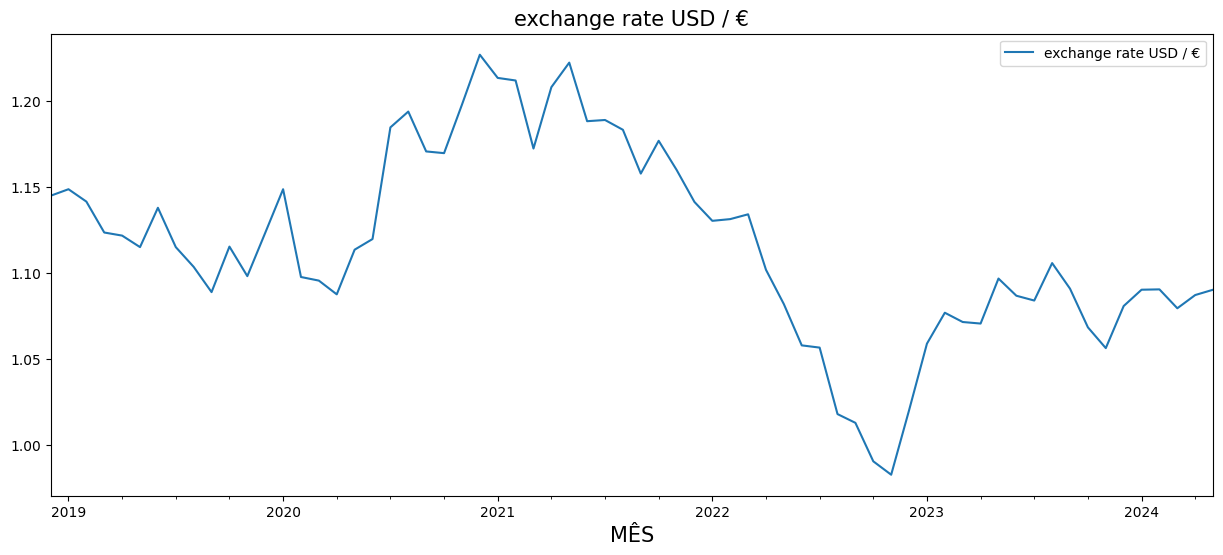

In [99]:
dfcambio.plot(y='exchange rate USD / €')
plt.xlabel('MÊS',size=15)
plt.title('exchange rate USD / €',size=15)
plt.show()

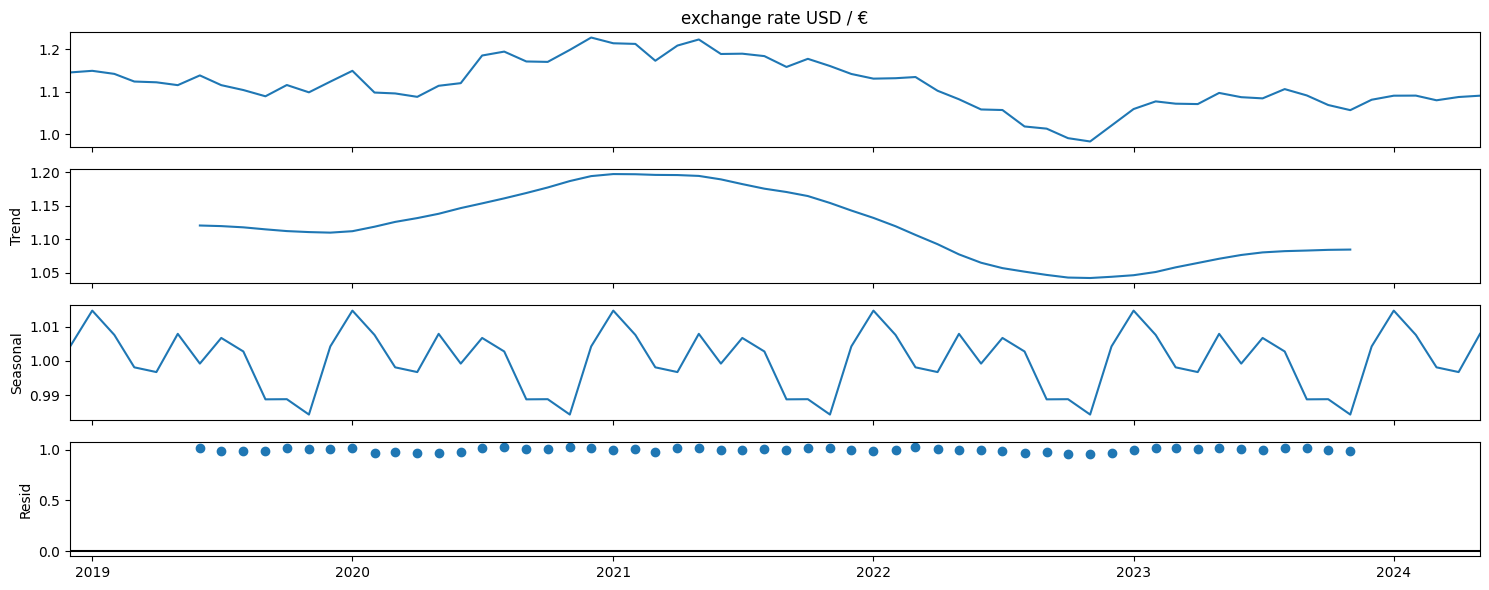

In [100]:
decompose_cambio = seasonal_decompose(dfcambio['exchange rate USD / €'], model='multiplicative', period=12)
fig = decompose_cambio.plot()
plt.tight_layout()
plt.show()

In [101]:
stepwise_cambio=auto_arima(dfcambio,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-207.727, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-222.601, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-205.736, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-228.875, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-228.016, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-230.813, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-224.363, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-229.827, Time=0.81 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-228.880, Time=0.25 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-226.893, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : 

In [102]:
stepwise_cambio

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [103]:
stepwise_cambio.aic()

-230.81326061512056

In [104]:
stepwise_cambio1=auto_arima(dfcambio,start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-207.727, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-231.512, Time=0.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-224.363, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-230.813, Time=0.29 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-229.827, Time=0.81 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=-227.773, Time=0.58 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-205.736, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-222.641, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-229.566, Time=0.33 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-226.988, Time=0.52 sec
 ARIMA(0,1,1)(2,1,0)

In [105]:
stepwise_cambio1

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [106]:
stepwise_cambio1.aic()

-231.511536855556

In [107]:
train_cambio=dfcambio.loc['2018-12-01':'2023-04-01']
test_cambio=dfcambio.loc['2023-05-01':]

In [108]:
stepwise_cambio.fit(train_cambio)
stepwise_cambio1.fit(train_cambio)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [109]:
forecast_cambio=stepwise_cambio.predict(n_periods=24)
forecast_cambio1=stepwise_cambio1.predict(n_periods=24)

In [110]:
forecast_cambio=pd.DataFrame(forecast_cambio,index=test_cambio.index, columns=['previsão modelo 1'])
forecast_cambio1=pd.DataFrame(forecast_cambio1,index=test_cambio.index, columns=['previsão modelo 2'])

In [111]:
forecast_cambio.head(10)

,previsão modelo 1
MÊS,
2023-05-01,1.085934
2023-06-01,1.074347
2023-07-01,1.108291
2023-08-01,1.105486
2023-09-01,1.084201
2023-10-01,1.086683
2023-11-01,1.094653
2023-12-01,1.109192
2024-01-01,1.104248


In [112]:
forecast_cambio1.head(10)

,previsão modelo 2
MÊS,
2023-05-01,1.080687
2023-06-01,1.077305
2023-07-01,1.093211
2023-08-01,1.088809
2023-09-01,1.068509
2023-10-01,1.080104
2023-11-01,1.079185
2023-12-01,1.093065
2024-01-01,1.094617


<Figure size 2000x500 with 0 Axes>

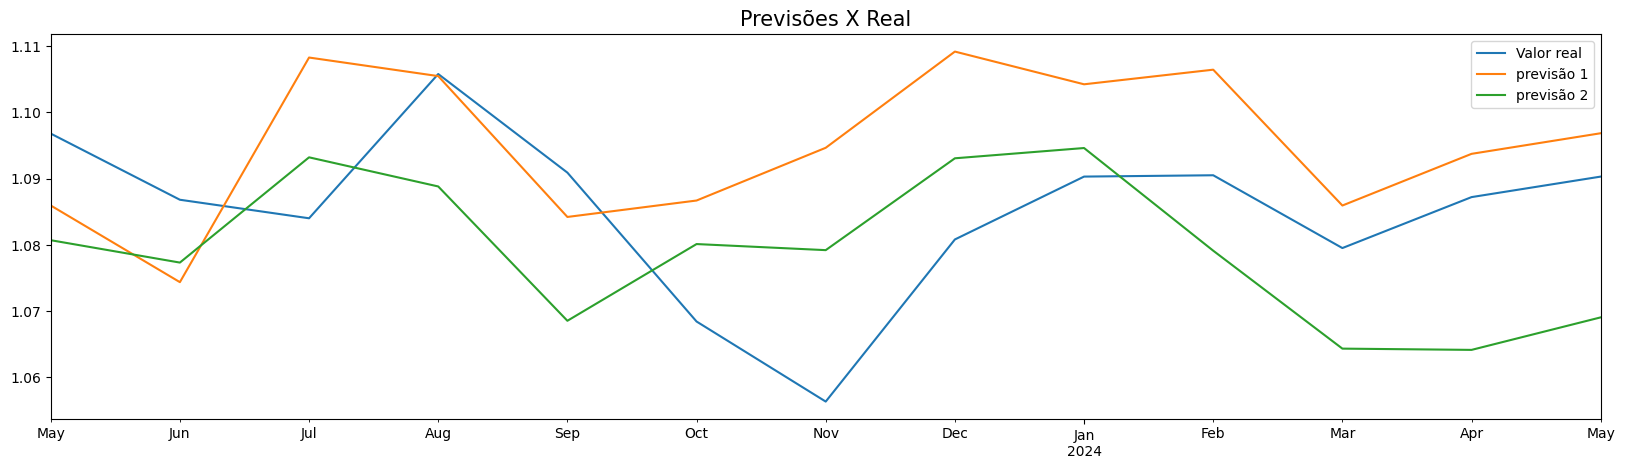

In [113]:
plt.figure(figsize=(20,5))
pd.concat([test_cambio,forecast_cambio, forecast_cambio1],axis=1).plot(figsize=(20,5))
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.legend(['Valor real','previsão 1','previsão 2'])
plt.show();

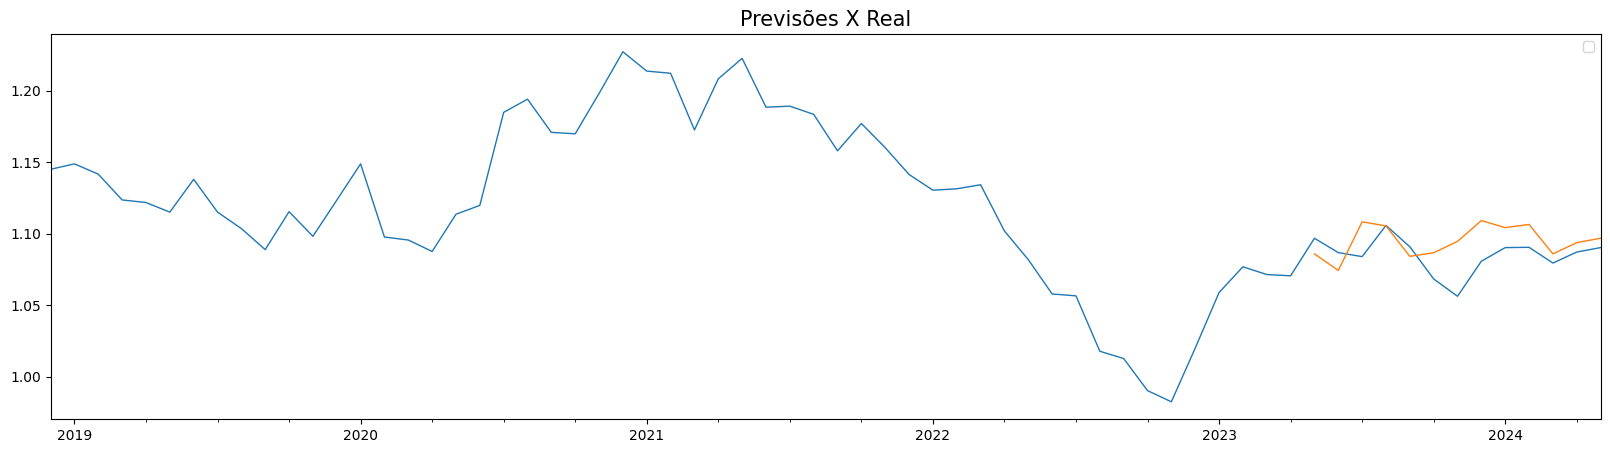

In [114]:
pd.concat([dfcambio,forecast_cambio],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();

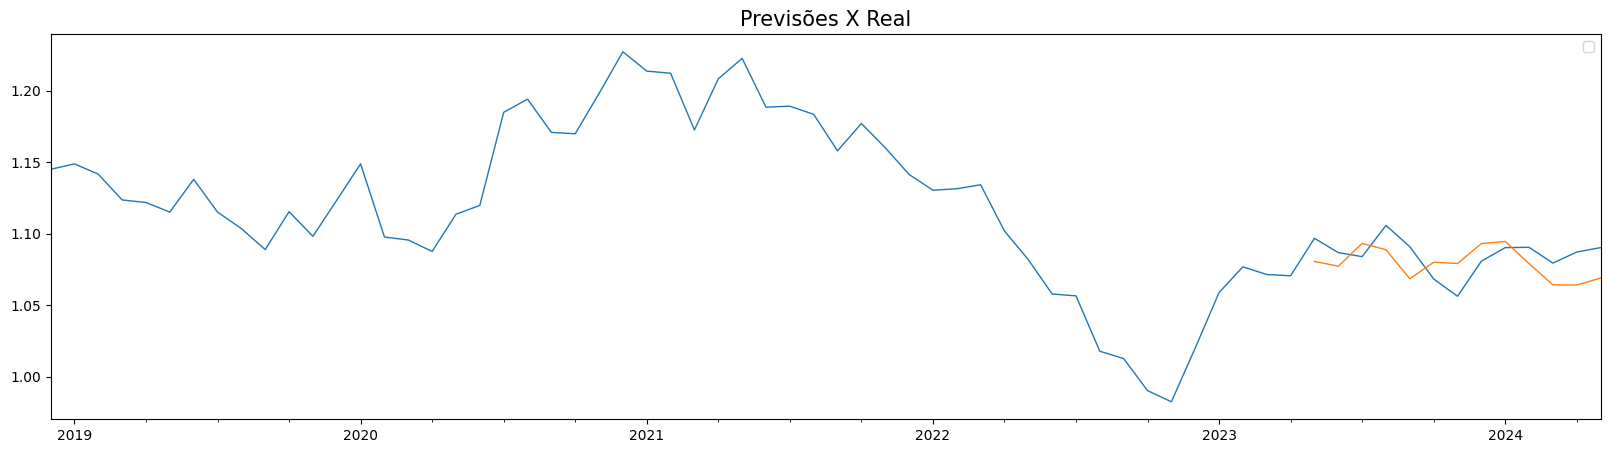

In [115]:
pd.concat([dfcambio,forecast_cambio1],axis=1).plot(linewidth=1,figsize=(20,5))
plt.legend('')
plt.xlabel('')
plt.title('Previsões X Real',size=15)
plt.show();